In [ ]:
# !pip install wikipedia
# !pip install wikitextparser
# !pip install Wikipedia-API
# !pip install scikit-image

In [1]:
from my_utils import mashrooms as mr
import wikipedia as wiki
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import requests
from io import BytesIO
import skimage
from pprint import pprint
import numpy as np

In [2]:
def read_wiki_images(url, show_image=False):
    if isinstance(url, list):
        if len(url)>3:
            cols = 3
            rows = len(url)//cols
        else:
            cols = len(url)
            rows = 1
    else:
        rows = 1
        cols = 1
    img = skimage.io.imread(url)
    if show_image:
        plt.rcParams['figure.figsize'] = (3,3)
        plt.imshow(img);
        plt.show()
class WikiArticle(object):
    def __init__(self, title = '', language = 'ru'):
        self.title = title
        self.lang = language
        wiki.set_lang(self.lang)
    def set_lang(self):
        wiki.set_lang(self.lang)
    
    def get_article_wiki(self):
        try:
            self.page = wiki.WikipediaPage(self.title)
            return self.page
        except Exception as e:
            print("[ERROR] Page not read! See below errors:")
            print(e)
    def get_images_links(self):
        self.links_images = self.page.images
        self.links_images = [i for i in self.links_images if i.endswith('.jpg') or i.endswith('.png')]
        return self.links_images
        # page.split('\n')

In [8]:
mashrooms_dict = mr.mashrooms_dict
# mashrooms_dict[0]
item = mashrooms_dict[-1]['rus']
item

'Моховик зелёный'

['https://upload.wikimedia.org/wikipedia/commons/7/72/Boletus_subtomentosus.jpg']


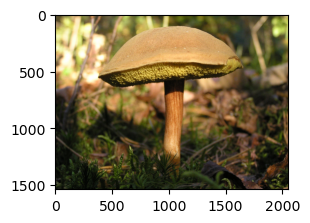

In [9]:
page = WikiArticle(item, 'ru')
# page = WikiArticle('World', 'ru')
# page = WikiArticle('Волоконница звёздчатоспоровая', 'ru')
article = page.get_article_wiki()
img_links = page.get_images_links()
print(img_links)
if isinstance(img_links, list):
    [read_wiki_images(link, show_image=True) for link in img_links]
else:
    read_wiki_images(img_links, show_image=True)

In [10]:
article.categories

['Категория:Биологические статьи без ITIS',
 'Категория:Болетовые',
 'Категория:Виды грибов, описанные в Systema mycologicum',
 'Категория:Грибы-космополиты',
 'Категория:Грибы по алфавиту',
 'Категория:Мультирегионально-лесные грибы',
 'Категория:Статьи без ссылки на Викивиды',
 'Категория:Страницы, использующие волшебные ссылки ISBN',
 'Категория:Съедобные грибы']

In [21]:
content = [i for i in article.content.split('\n') if i!='']
sections_article = [i for i in article.content.split('\n') if i!='' and i.startswith("==")]
content

['Мохови́к зелёный (лат. Xerócomus subtomentósus) — съедобный гриб из рода Моховик (лат. Xerocomus). В некоторых классификациях его как и весь род Моховик включают в род Боровик или Болетус (лат. Boletus) и называют соответственно Boletus subtomentosus. Наиболее распространённый вид из рода Моховик. ',
 'Научные синонимы:',
 'Boletus subtomentosus L., 1753 basionym',
 'Leccinum subtomentosum (L.) Gray, 1821',
 'Rostkovites subtomentosus (L.) P. Karst., 1881',
 'Versipellis subtomentosus (L.) Quél., 1886 и др.',
 '== Описание ==',
 'Шляпка диаметром 3—10 см (иногда до 16 см), подушковидно-выпуклая, на ощупь бархатистая, цвет шляпки — серовато- или оливково-бурый.',
 'Мякоть белая, не синеющая или слегка синеющая на разрезе.',
 'Гименофор (трубочки) приросший, желтоватый, оливково-жёлтый, при надавливании слегка синеет, поры зрелых грибов крупные, угловатые.',
 'Ножка цилиндрическая или сужающаяся к основанию, 4—10 см высотой и 1—2 см толщиной, гладкая, волокнистая с тёмно-бурой сеточкой

In [22]:
sections_article

['== Описание ==',
 '== Экология и распространение ==',
 '== Сходные виды ==',
 '== Употребление ==',
 '== Примечания ==',
 '=== Литература ===']

In [13]:
pprint(article.section('Биологическое описание'))

None
